# Assessment

<p style='text-align: justify;'>
Congratulations on finishing the HPC simulations course!! Hopefully you learned some valuable skills along the way and had fun doing it. Now it's time to put these skills to the test. In this evaluation, we have the following problem: Create a neural network to predict atmospheric wind speed. You must create and train a model using one of the tools studied and evaluate its performance. Let's get started!
</p>

## Problem: Predict atmospheric wind speed

<p style='text-align: justify;'>
Predicting atmospheric wind speed is of great importance in various applications, such as weather forecasting, aviation, wind energy park deployment, among others. An accurate understanding of wind speed and direction is essential for making informed decisions in many sectors.
</p>
<p style='text-align: justify;'>
In this challenge, your goal is to develop a machine learning model capable of predicting wind speed one hour ahead. To accomplish this, you will use one of the tools studied in the course and leverage the knowledge you have acquired to create and train a precise neural network model using appropriate computational resources. After training the model, you will also need to assess its forecasting ability and determine its effectiveness.
</p>    

<p style="text-align: center;">
 <img src="../images/figure01_meteorological_station.jpg" style="width: 700px;">
</p>


### Wind dataset

We will use the [Wind dataset](data/wind-dataset/wind-dataset.csv) of a city where we will have various meteorological information available in which we will obtain information related to wind measurement so that we can develop our algorithm. Let's look at a sample below.

|   id |   year |   day |   min |   dir_avg |   tp_sfc |   humid |   press |   ws_10m |   wd_10m |
|-----:|-------:|------:|------:|----------:|---------:|--------:|--------:|---------:|---------:|
|    1 |   2019 |    91 |     0 |    -0.417 |    24.62 |   89.8  | 1010.86 |    1.273 |     64.5 |
|    2 |   2019 |    91 |     1 |    -0.377 |    24.69 |   89.7  | 1010.83 |    1.118 |     57.4 |
|    3 |   2019 |    91 |     2 |    -0.346 |    24.67 |   90    | 1010.86 |    1.095 |     91.7 |
|    4 |   2019 |    91 |     3 |    -0.471 |    24.64 |   90.6  | 1010.89 |    0.995 |     76   |
|    5 |   2019 |    91 |     4 |    -0.444 |    24.58 |   90.6  | 1010.89 |    0.93  |     85.8 |
|    6 |   2019 |    91 |     5 |    -0.444 |    24.59 |   90.6  | 1010.86 |    0.747 |     98.5 |
|    7 |   2019 |    91 |     6 |    -0.431 |    24.57 |   90.4  | 1010.86 |    0.669 |     87.5 |
|    8 |   2019 |    91 |     7 |    -0.408 |    24.6  |   90.5  | 1010.89 |    0.598 |     88.2 |
|    9 |   2019 |    91 |     8 |    -0.448 |    24.59 |   90.7  | 1010.8  |    0.452 |     84.5 |
|   10 |   2019 |    91 |     9 |    -0.368 |    24.58 |   90.4  | 1010.89 |    0.913 |     78.5 |

Below, we have the description of each of the identifiers in our dataset.

|          |                |           |              |
|----------|----------------|-----------|--------------|
| **id:**  | A unique identifier for each record in the table.                  | **humid:** | Relative humidity. |                  
| **year:**| The year to which the data refers.                                 | **press:** | Atmospheric pressure.|                        
| **day:** | The day of the year when the measurements were taken.              | **tp_sfc:** | Surface temperature.|                 
| **min:** | The minute of the hour when the measurements were taken.           | **ws_10m:** | Wind speed at 10 meters above the surface.|
| **dir_avg:** | Average wind direction.                                        | **wd_10m:** | Wind direction at 10 meters above the surface.|


The model for predicting wind speed one hour ahead is as follows:

<p style="text-align: center;">
 <img src="../images/figure05_ann_predicted_wind_model.jpg" style="width: 700px;">
</p>

Our mission is to develop artificial intelligence capable of making wind speed predictions based on the data available. The algorithm must meet the following criteria:

* Implement the algorithm using TensorFlow or PyTorch,
* Predict the wind speed two hours ahead,
* Measure the execution time of the algorithm developed on CPU and/or GPU environment.

## ☆ `Solution using TensorFlow on CPU environment` ☆

First we will import the libraries necessary to create our neural network, work with database, and plot graphs

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from pathlib import Path

#### **Read file with data**

Now we will read the data present in our .csv spreadsheet and separate the data for training.

In [2]:
wind_dataset = pd.read_csv("data/wind-dataset/wind-dataset.csv", sep=";", header=0)

x = wind_dataset.drop(columns=['id','year','ws_10m'])
y = wind_dataset['ws_10m']

In [3]:
x, y

(       day   min  dir_avg  tp_sfc  humid    press  wd_10m
 0       91     0   -0.417   24.62   89.8  1010.86    64.5
 1       91     1   -0.377   24.69   89.7  1010.83    57.4
 2       91     2   -0.346   24.67   90.0  1010.86    91.7
 3       91     3   -0.471   24.64   90.6  1010.89    76.0
 4       91     4   -0.444   24.58   90.6  1010.89    85.8
 ...    ...   ...      ...     ...    ...      ...     ...
 43195  120  1435    0.000   21.43   81.7  1010.85    25.4
 43196  120  1436    0.000   21.44   81.5  1010.88    16.3
 43197  120  1437    0.000   21.44   81.9  1010.88    24.3
 43198  120  1438    0.000   21.47   82.0  1010.85    51.4
 43199  120  1439    0.000   21.44   81.8  1010.88    45.7
 
 [43200 rows x 7 columns],
 0        1.273
 1        1.118
 2        1.095
 3        0.995
 4        0.930
          ...  
 43195    1.274
 43196    1.563
 43197    1.025
 43198    0.387
 43199    0.083
 Name: ws_10m, Length: 43200, dtype: float64)

#### **Normalizing data**

Now it will be necessary to normalize the data so that we can train our network properly.

In [4]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

#### Separate training and testing data

You will need to reserve part of the dataset for training and another for testing. In our case, we reserve 70% of the available data to use in our training and 30% will be used to validate our neural network.

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#### **Show training data**

In [6]:
print("------------x_train data------------")
print(x_train,"\n")

print("------------y_train data------------")
print(y_train,"\n")

------------x_train data------------
[[ 0.51990416  0.03007033 -0.34625831 ... -0.01242871 -0.43006397
  -1.1954858 ]
 [-0.86650693 -0.31152866 -0.34637257 ... -0.61607112  0.02666017
   0.25839491]
 [ 1.44417822 -1.68033025 -0.34625831 ...  0.94887536 -1.47937325
  -0.5938202 ]
 ...
 [ 1.32864396 -0.00360844 -0.34625831 ...  0.6237284  -0.14388872
  -1.10012093]
 [-1.67524673  0.33799055  2.90131922 ... -1.13489258  0.55854146
  -1.2084901 ]
 [-0.51990416  1.62500084 -0.34757444 ... -0.01949712  0.09025468
  -1.23883346]] 

------------y_train data------------
28092    1.338
10670    4.479
38901    0.426
23709    0.536
37000    3.160
         ...  
6265     3.404
11284    4.737
38158    1.256
860      3.639
15795    2.763
Name: ws_10m, Length: 30240, dtype: float64 



#### **Show data reserved for testing**

In [7]:
print("------------x_test data------------")
print(x_test,"\n")

print("------------y_test data------------")
print(y_test,"\n")

------------x_test data------------
[[-5.19904158e-01  9.26166280e-02  3.45824025e+00 ... -9.32735987e-01
   8.10028809e-01 -1.04376897e+00]
 [-2.88835643e-01 -4.69097207e-02  9.55481133e-01 ...  7.22686172e-01
   4.92056301e-01  1.83624995e+00]
 [-6.35438416e-01  1.26896809e+00 -3.46876169e-01 ... -6.57067908e-01
   1.00370297e+00 -3.90953120e-01]
 ...
 [ 1.32864396e+00 -1.20281335e-03 -3.46258308e-01 ...  5.95454750e-01
  -1.43888716e-01 -1.24143432e+00]
 [-4.04369901e-01 -8.33549652e-01 -3.48683200e-01 ...  1.00542266e+00
  -2.21936514e-01 -4.11760000e-01]
 [ 9.82041188e-01  5.89378542e-02 -3.46258308e-01 ...  1.24574868e+00
   1.99808973e+00  8.33184963e-01]] 

------------y_test data------------
15158    0.456
17980    1.179
14207    0.252
42340    0.000
22155    0.000
         ...  
28936    0.098
34897    0.155
38159    1.994
16213    0.005
33864    1.608
Name: ws_10m, Length: 12960, dtype: float64 



#### **Create neural network**

Now that the data has been separated, let's create our neural network so that we can carry out training.

In [8]:
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Dense(128, input_shape=(x_train.shape[1],), activation='relu'))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='linear'))

#### **Compiling the model**

In [9]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

#### **Training and evaluating the model**

In [10]:
start_training_time = time.time()

with tf.device('/CPU:0'):
        early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=200, callbacks=[early_stopping])


mse, _ = model.evaluate(x_test, y_test)
print(f'Mean Squared Error on Test Set: {mse}')

end_training_time = time.time()

Epoch 1/200
945/945 [==============================] - 3s 2ms/step - loss: 1.4623 - mean_squared_error: 1.4623 - val_loss: 0.9900 - val_mean_squared_error: 0.9900
Epoch 2/200
945/945 [==============================] - 2s 2ms/step - loss: 0.8845 - mean_squared_error: 0.8845 - val_loss: 0.8141 - val_mean_squared_error: 0.8141
Epoch 3/200
945/945 [==============================] - 2s 2ms/step - loss: 0.7859 - mean_squared_error: 0.7859 - val_loss: 0.8597 - val_mean_squared_error: 0.8597
Epoch 4/200
945/945 [==============================] - 2s 2ms/step - loss: 0.7475 - mean_squared_error: 0.7475 - val_loss: 0.7295 - val_mean_squared_error: 0.7295
Epoch 5/200
945/945 [==============================] - 2s 2ms/step - loss: 0.7104 - mean_squared_error: 0.7104 - val_loss: 0.6932 - val_mean_squared_error: 0.6932
Epoch 6/200
945/945 [==============================] - 2s 2ms/step - loss: 0.6887 - mean_squared_error: 0.6887 - val_loss: 0.7534 - val_mean_squared_error: 0.7534
Epoch 7/200
945/945 [=

#### Plot learning graph

Let's plot a graph where we plot the training and validation curves so that we can evaluate our model.

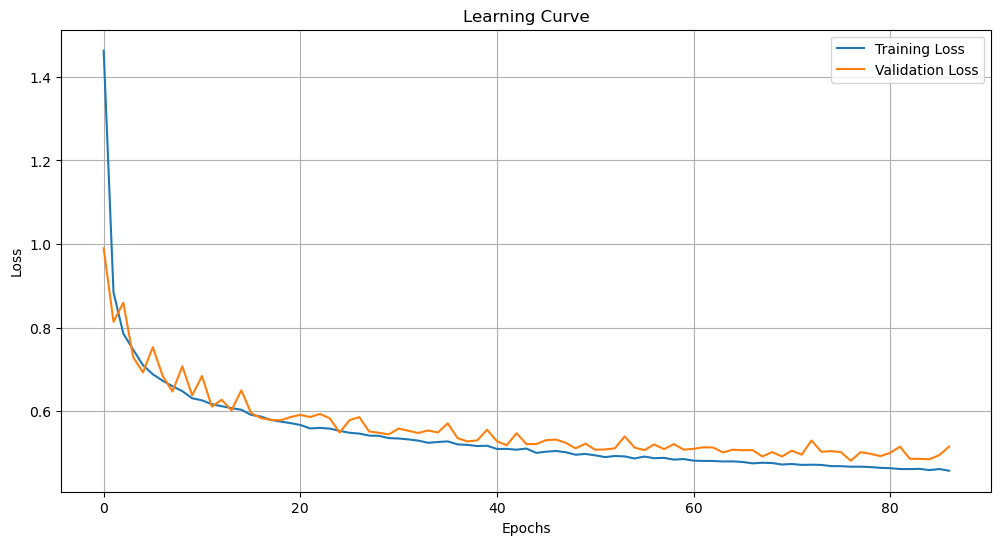

In [11]:
def plot_learning_curve(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.title('Learning Curve')
    plt.show()

plot_learning_curve(history)


### Predicting wind speed two hours ahead

At this point we already have our network trained with the saved weather forecast values. Now we need to obtain the values of the predicted speed of time, move two hours forward in time, and then retrain our network so that we can obtain the future forecast.

Adding the <b>ws_10m_predict</b> wind forecast values that we got in our training and also adding <b>60 min</b> to our dataset and repeating this process twice to allow us to predict the wind two hours in advance.

In [12]:
time_to_predicted = 2 # predict the wind speed two hours ahead

### Training the network with the new data

1350/1350 [==============================] - 1s 1ms/step
Epoch 1/200
945/945 [==============================] - 2s 2ms/step - loss: 0.8594 - mean_squared_error: 0.8594 - val_loss: 0.3851 - val_mean_squared_error: 0.3851
Epoch 2/200
945/945 [==============================] - 2s 2ms/step - loss: 0.3196 - mean_squared_error: 0.3196 - val_loss: 0.2664 - val_mean_squared_error: 0.2664
Epoch 3/200
945/945 [==============================] - 2s 2ms/step - loss: 0.2378 - mean_squared_error: 0.2378 - val_loss: 0.1880 - val_mean_squared_error: 0.1880
Epoch 4/200
945/945 [==============================] - 2s 2ms/step - loss: 0.1981 - mean_squared_error: 0.1981 - val_loss: 0.1452 - val_mean_squared_error: 0.1452
Epoch 5/200
945/945 [==============================] - 2s 2ms/step - loss: 0.1550 - mean_squared_error: 0.1550 - val_loss: 0.1229 - val_mean_squared_error: 0.1229
Epoch 6/200
945/945 [==============================] - 2s 2ms/step - loss: 0.1223 - mean_squared_error: 0.1223 - val_loss: 0.101

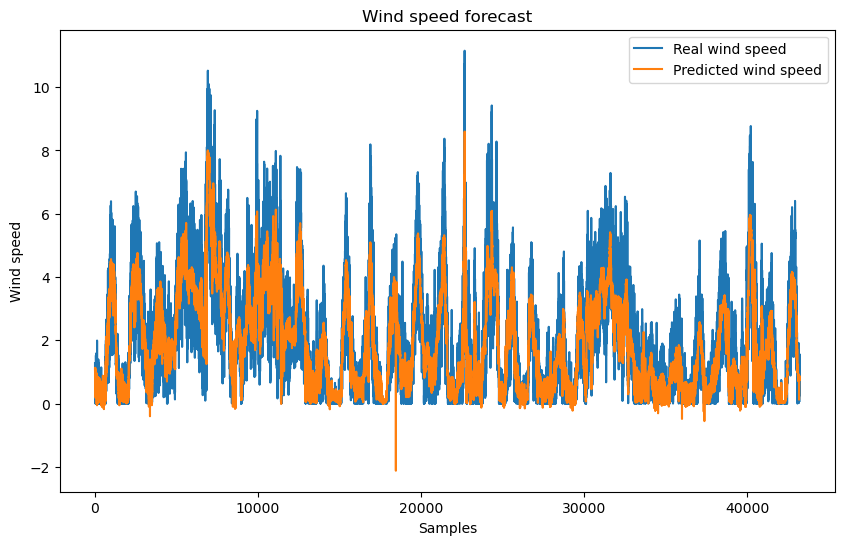

In [13]:
start_predicted_time = time.time()

wind_dataset_predict = wind_dataset.copy()

for _ in range (time_to_predicted):

    wind_dataset_predict['ws_10m_predict'] = model.predict(x)                            # add wind speed predictions in the table
    wind_dataset_predict['min'] = wind_dataset_predict['min'] + 60                       # add 60 min (1 hour) at min table  
    wind_dataset_predict.to_csv("data/wind-dataset/wind-dataset-predict.csv", sep=";")

    x_train, x_test, y_train, y_test = train_test_split(x, wind_dataset_predict['ws_10m_predict'], test_size=0.3, random_state=42)
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(128, input_shape=(x_train.shape[1],), activation='relu'))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='linear'))
    
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
    
    with tf.device('/CPU:0'):
        early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=200, callbacks=[early_stopping])

    wind_dataset_predict['ws_10m_predict'] = model.predict(x)

plt.figure(figsize=(10, 6))
plt.plot(wind_dataset_predict['ws_10m'], label='Real wind speed')
plt.plot(wind_dataset_predict['ws_10m_predict'], label='Predicted wind speed')
plt.xlabel('Samples')
plt.ylabel('Wind speed')
plt.legend()
plt.title('Wind speed forecast')
plt.show()

end_predicted_time = time.time()

### Plot wind forecast

Here we will plot the wind forecast for one hour ahead.

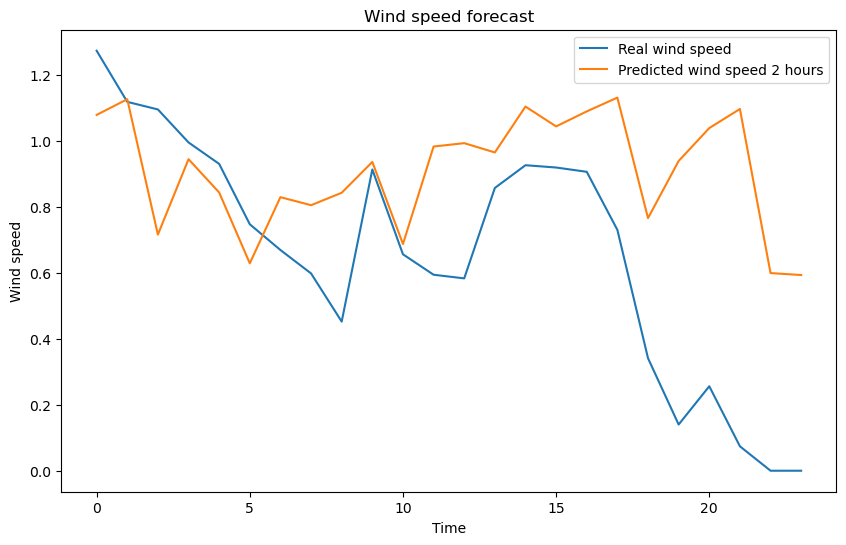

In [16]:
# Choose the number of samples you want to display on the chart
num_samples_to_display = 24

# Plot a graph to compare ws_10m and ws_10m_predict with the selected number of samples
plt.figure(figsize=(10, 6))
plt.plot(wind_dataset_predict['ws_10m'][:num_samples_to_display], label='Real wind speed')
plt.plot(wind_dataset_predict['ws_10m_predict'][:num_samples_to_display], label='Predicted wind speed 2 hours')
plt.xlabel('Time')
plt.ylabel('Wind speed')
plt.legend()
plt.title('Wind speed forecast')
plt.show()


### Measuring the algorithm execution time

As part of the work, we will measure the execution time of our algorithm, which in this case was executed on a CPU.

In [17]:
training_time  = end_training_time  - start_training_time
predicted_time = end_predicted_time - start_predicted_time

print(f"\nCPU Training wind time: {training_time:.2f} seconds or ({training_time / 60:.2f} minutes)")
print(f"\nCPU Predicted wind time: {predicted_time:.2f} seconds or ({predicted_time / 60:.2f} minutes)")


CPU Training wind time: 142.45 seconds or (2.37 minutes)

CPU Predicted wind time: 175.65 seconds or (2.93 minutes)


## ☆ `Solution using Pytorch on GPU environment` ☆

First, import all libraries:

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from pathlib import Path

Do not forget to use your GPU as a device for training the model:

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Now, retrieve data from the dataset. It's a good practice to use the Pandas library for better data management in our code, and it's also good to always normalize data from the dataset:

In [12]:
wind_dataset = pd.read_csv("wind-dataset.csv", sep=";", header=0)

x = wind_dataset.drop(columns=['id','year','ws_10m']).values
y = wind_dataset['ws_10m'].values

scaler = StandardScaler()
x = scaler.fit_transform(x)

Create Pytorch data structres, and move data to the device selected. Do not forget to split the dataset for training and testing.

In [13]:
x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train, x_test, y_train, y_test = x_train.to(device), x_test.to(device), y_train.to(device), y_test.to(device)

# Create PyTorch datasets
train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)

# DataLoaders
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

Create a simple Network in Pytorch:

In [14]:
class WindModel(nn.Module):
    def __init__(self, input_dim):
        super(WindModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = WindModel(x_train.shape[1]).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

In [15]:
def train_model(model, criterion, optimizer, train_loader, test_loader, epochs=200, patience=10):
    best_loss = np.inf
    patience_counter = 0
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_loss)

        val_running_loss = 0.0
        model.eval()
        with torch.no_grad():
            for inputs, targets in test_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_running_loss += loss.item() * inputs.size(0)

        val_loss = val_running_loss / len(test_loader.dataset)
        val_losses.append(val_loss)

        print(f'Epoch {epoch+1}/{epochs} | Training Loss: {epoch_loss:.4f} | Validation Loss: {val_loss:.4f}')

        if val_loss < best_loss:
            best_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print('Early stopping!')
            break

    return train_losses, val_losses

# Inicialização do modelo, critério de perda e otimizador
model = WindModel(x_train.shape[1]).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

# Treinamento
start_training_time = time.time()

train_losses, val_losses = train_model(model, criterion, optimizer, train_loader, test_loader)

end_training_time = time.time()

print(f'Training time: {start_training_time - end_training_time}')

Epoch 1/200 | Training Loss: 1.7453 | Validation Loss: 1.1976
Epoch 2/200 | Training Loss: 1.0649 | Validation Loss: 0.9040
Epoch 3/200 | Training Loss: 0.8881 | Validation Loss: 0.8310
Epoch 4/200 | Training Loss: 0.8072 | Validation Loss: 0.7966
Epoch 5/200 | Training Loss: 0.7649 | Validation Loss: 0.7803
Epoch 6/200 | Training Loss: 0.7567 | Validation Loss: 0.6900
Epoch 7/200 | Training Loss: 0.7113 | Validation Loss: 0.6916
Epoch 8/200 | Training Loss: 0.6891 | Validation Loss: 0.6829
Epoch 9/200 | Training Loss: 0.6785 | Validation Loss: 0.6737
Epoch 10/200 | Training Loss: 0.6548 | Validation Loss: 0.6485
Epoch 11/200 | Training Loss: 0.6507 | Validation Loss: 0.6264
Epoch 12/200 | Training Loss: 0.6396 | Validation Loss: 0.6439
Epoch 13/200 | Training Loss: 0.6239 | Validation Loss: 0.6674
Epoch 14/200 | Training Loss: 0.6221 | Validation Loss: 0.6070
Epoch 15/200 | Training Loss: 0.6089 | Validation Loss: 0.6309
Epoch 16/200 | Training Loss: 0.6070 | Validation Loss: 0.6189
E

Plot the Loss and Validation Loss vs. Epoch graph to gain a better understanding of how the training worked:

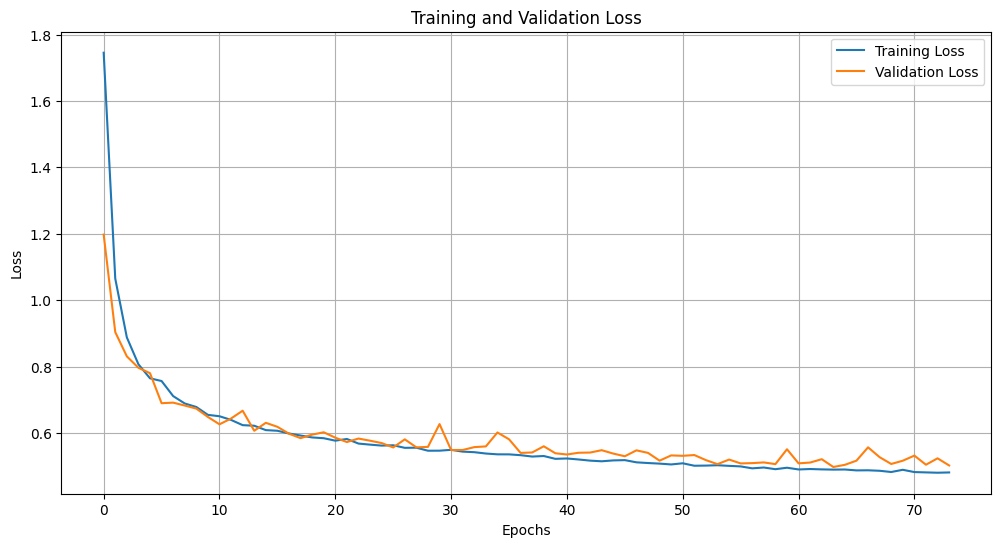

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Training and Validation Loss')
plt.show()

In the end, test your model with the test data from the original dataset and check the root mean square error value:

Root Mean Squared Error on Test Set: 0.7088753692647517


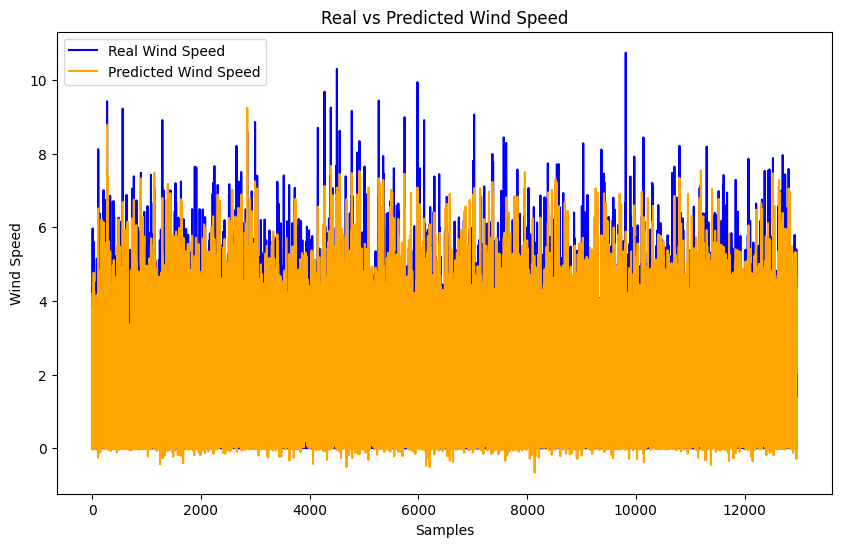

In [17]:
# RMSE
model.eval()
with torch.no_grad():
    predictions = model(x_test)
    mse = criterion(predictions, y_test).item()
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error on Test Set: {rmse}')

# Plot real values vs predicted values
real = y_test.cpu().numpy()
predicted = predictions.cpu().numpy()

plt.figure(figsize=(10, 6))
plt.plot(real, label='Real Wind Speed', color='blue')
plt.plot(predicted, label='Predicted Wind Speed', color='orange')
plt.xlabel('Samples')
plt.ylabel('Wind Speed')
plt.legend()
plt.title('Real vs Predicted Wind Speed')
plt.show()